In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

import acquire
import prepare

In [2]:
df = acquire.get_telco_data()

In [3]:
train, validate, test = prepare.prep_telco_data(df)

In [4]:
#train.info()

# Is the tenure of customers who have churned significantly different than the tenure of customers who have NOT churned?

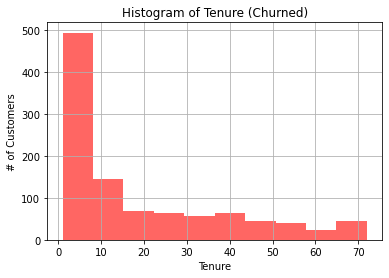

In [43]:
def get_hist_tenure_churn(train):
    #tenure of customers who have churned
    plt.hist(train[train.churn_Yes == 1].tenure, color='#FF6663')
    plt.xlabel('Tenure')
    plt.ylabel('# of Customers')
    plt.grid(True)
    plt.title('Histogram of Tenure (Churned)')
    plt.show()

get_hist_tenure_churn(train)

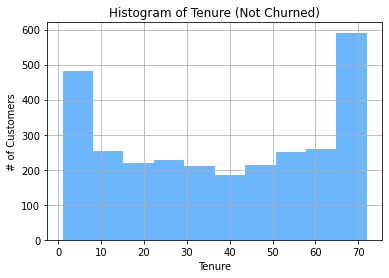

In [42]:
def get_hist_tenure_no_churn(train):
    #tenure of customers who have NOT churned
    plt.hist(train[train.churn_Yes == 0].tenure, color='#6EB5FF')
    plt.xlabel('Tenure')
    plt.ylabel('# of Customers')
    plt.grid(True)
    plt.title('Histogram of Tenure (Not Churned)')
    plt.show()
    
get_hist_tenure_no_churn(train)

In [7]:
def get_ind_ttest_tenure(train):

    churn_sample=train[train.churn_Yes==1].tenure
    no_churn_sample=train[train.churn_Yes==0].tenure
    overall_mean = train.tenure.mean()

    t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
    print(f't     = {t:.4f}')
    print(f'p     = {p:.4f}')

# How often does churn occur?

In [8]:
def get_pie_churn(train):
    '''get pie char for percent churn overall'''
    
    #values and labels for chart
    values = [len(train.churn_Yes[train.churn_Yes == 1]), len(train.churn_Yes[train.churn_Yes == 0])]
    labels = ['Churn', 'Not Churned']

    #generate and show
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    plt.title('Churn Rate Overall')
    plt.show()
    
#get_pie_churn(train)

> Our baseline is about 73% Not Churned in customers.

> If we assumed a customer will not churn every time, we would be correct 73% of the time.

In [9]:
#mult1_churn1 = train.multiple_lines_Yes[train.churn_Yes == 1].sum()
#mult0_churn1 = len(train.multiple_lines_Yes[train.churn_Yes == 1]) - mult1_churn1
#mult1_churn0 = train.multiple_lines_Yes[train.churn_Yes == 0].sum()
#mult0_churn0 = len(train.multiple_lines_Yes[train.churn_Yes == 0]) -mult1_churn0

#print(mult1_churn1)
#print(mult0_churn1)
#print(len(train.multiple_lines_Yes[train.churn_Yes == 1]))

#print(mult1_churn0)
#print(mult0_churn0)
#print(len(train.multiple_lines_Yes[train.churn_Yes == 0]))

In [10]:
#len(train.multiple_lines_Yes[train.churn_Yes == 0])

In [11]:
#len(train.multiple_lines_Yes)

In [12]:
def get_pie_mult(train):
    '''get pie charts for percent churn for
    customers who have multiple lines 
    and customers who do not have multiple lines'''
    
    #create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    #values and labels for chart
    mult1_churn1 = train.multiple_lines_Yes[train.churn_Yes == 1].sum()
    mult0_churn1 = len(train.multiple_lines_Yes[train.churn_Yes == 1]) - mult1_churn1
    mult1_churn0 = train.multiple_lines_Yes[train.churn_Yes == 0].sum()
    mult0_churn0 = len(train.multiple_lines_Yes[train.churn_Yes == 0]) -mult1_churn0   
    
    values1 = [mult1_churn1,mult1_churn0]
    values2 = [mult0_churn1,mult0_churn0]
    labels = ['Churn', 'Not Churned']

    #generate and show
    ax1.pie(values1, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax1.title.set_text('Has Multiple Lines')
    ax2.pie(values2, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax2.title.set_text('No Multiple Lines')
    
    plt.tight_layout()
    plt.show()
    
#get_pie_mult(train)

In [13]:
dep1_churn1 = train.dependents_encoded[train.churn_Yes == 1].sum()
dep0_churn1 = len(train.dependents_encoded[train.churn_Yes == 1]) - dep1_churn1
dep1_churn0 = train.dependents_encoded[train.churn_Yes == 0].sum()
dep0_churn0 = len(train.dependents_encoded[train.churn_Yes == 0]) - dep1_churn0

In [14]:
def get_pie_dep(train):
    '''get pie charts for percent churn for
    customers who have dependents 
    and customers who do not have dependents'''
    
    #create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    #values and labels for chart
    dep1_churn1 = train.dependents_encoded[train.churn_Yes == 1].sum()
    dep0_churn1 = len(train.dependents_encoded[train.churn_Yes == 1]) - dep1_churn1
    dep1_churn0 = train.dependents_encoded[train.churn_Yes == 0].sum()
    dep0_churn0 = len(train.dependents_encoded[train.churn_Yes == 0]) - dep1_churn0

    values1 = [dep1_churn1,dep1_churn0]
    values2 = [dep0_churn1,dep0_churn0]
    labels = ['Churn', 'Not Churned']

    #generate and show
    ax1.pie(values1, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax1.title.set_text('Has Dependents')
    ax2.pie(values2, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax2.title.set_text('No Dependents')
    
    plt.tight_layout()
    plt.show()
    
#get_pie_dep(train)

In [15]:
def get_pie_part(train):
    '''get pie charts for percent churn for
    customers who have partner 
    and customers who do not have partner'''
    
    #create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    #values and labels for chart
    part1_churn1 = train.partner_encoded[train.churn_Yes == 1].sum()
    part0_churn1 = len(train.partner_encoded[train.churn_Yes == 1]) - part1_churn1
    part1_churn0 = train.partner_encoded[train.churn_Yes == 0].sum()
    part0_churn0 = len(train.partner_encoded[train.churn_Yes == 0]) - part1_churn0

    values1 = [part1_churn1,part1_churn0]
    values2 = [part0_churn1,part0_churn0]
    labels = ['Churn', 'Not Churned']

    #generate and show
    ax1.pie(values1, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax1.title.set_text('Has Partner')
    ax2.pie(values2, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax2.title.set_text('No Partner')
    
    plt.tight_layout()
    plt.show()
    
#get_pie_part(train)

In [16]:
def get_pie_sen(train):
    '''get pie charts for percent churn for
    customers who are senior citizens 
    and customers who are not senior citizens'''
    
    #create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    #values and labels for chart
    sen1_churn1 = train.senior_citizen[train.churn_Yes == 1].sum()
    sen0_churn1 = len(train.senior_citizen[train.churn_Yes == 1]) - sen1_churn1
    sen1_churn0 = train.senior_citizen[train.churn_Yes == 0].sum()
    sen0_churn0 = len(train.senior_citizen[train.churn_Yes == 0]) - sen1_churn0

    values1 = [sen1_churn1,sen1_churn0]
    values2 = [sen0_churn1,sen0_churn0]
    labels = ['Churn', 'Not Churned']

    #generate and show
    ax1.pie(values1, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax1.title.set_text('Is Senior Citizen')
    ax2.pie(values2, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax2.title.set_text('Not Senior Citizen')
    
    plt.tight_layout()
    plt.show()
    
#get_pie_sen(train)

In [17]:
def get_pie_int(train):
    '''get pie charts for percent churn for
    customers who have internet service 
    and customers who dont have internet service'''
    
    #create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    #values and labels for chart
    int1_churn1 = train.internet_service_type_None[train.churn_Yes == 1].sum()
    int0_churn1 = len(train.internet_service_type_None[train.churn_Yes == 1]) - int1_churn1
    int1_churn0 = train.internet_service_type_None[train.churn_Yes == 0].sum()
    int0_churn0 = len(train.internet_service_type_None[train.churn_Yes == 0]) - int1_churn0

    values1 = [int1_churn1,int1_churn0]
    values2 = [int0_churn1,int0_churn0]
    labels = ['Churn', 'Not Churned']

    #generate and show
    ax1.pie(values1, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax1.title.set_text('Has Internet Service')
    ax2.pie(values2, labels=labels, autopct='%.0f%%', colors=['#FF6663','#6EB5FF'])
    ax2.title.set_text('No Internet Service')
    
    plt.tight_layout()
    plt.show()
    
#get_pie_int(train)

## Modeling

In [18]:
#train.info()

In [19]:
#features to keep
keep_columns = ['dependents_encoded','internet_service_type_None','senior_citizen','partner_encoded', 'tenure', 'churn_Yes', 'multiple_lines_Yes'] 
#keep_columns = ['dependents_encoded','internet_service_type_None','senior_citizen','partner_encoded', 'tenure', 'churn_Yes'] 

In [20]:
train = train[keep_columns]
validate = validate[keep_columns]
test = test[keep_columns]

In [21]:
train_x = train.drop(columns='churn_Yes').reset_index(drop=True)
train_y = train[['churn_Yes']].reset_index(drop=True)

validate_x = validate.drop(columns='churn_Yes').reset_index(drop=True)
validate_y = validate[['churn_Yes']].reset_index(drop=True)

test_x = test.drop(columns='churn_Yes').reset_index(drop=True)
test_y = test[['churn_Yes']].reset_index(drop=True)

In [22]:
#train_x

### decision tree

In [29]:
def get_tree(train_x, validate_x, train_y, validate_y):
    
    '''get decision tree accuracy on train and validate'''
    #create classifier then fit
    tree = DecisionTreeClassifier(max_depth=5, random_state=777)
    tree = tree.fit(train_x, train_y)

    print(f"Accuracy of Decision Tree on train data is {tree.score(train_x, train_y)}")
    print(f"Accuracy of Decision Tree on validate data is {tree.score(validate_x, validate_y)}")
    
get_tree(train_x, validate_x, train_y, validate_y)

Accuracy of Decision Tree on train data is 0.7914655829311659
Accuracy of Decision Tree on validate data is 0.764218009478673


### rf

In [30]:
def get_rf(train_x, validate_x, train_y, validate_y):

    '''get rf accuracy on train and validate'''
    #create classifier and fit
    rf = RandomForestClassifier(max_depth=5, random_state=777)
    rf = rf.fit(train_x, train_y)

    print(f"Accuracy of Random Forest on train data is {rf.score(train_x, train_y)}")
    print(f"Accuracy of Random Forest on validate data is {rf.score(validate_x, validate_y)}")

### regression

In [32]:
def get_reg(train_x, validate_x, train_y, validate_y):

    '''get reg accuracy on train and validate'''
    #create classifier and fit
    logit = LogisticRegression(solver='liblinear')
    logit = logit.fit(train_x, train_y)

    print(f"Accuracy of Logistic Regression on train is {logit.score(train_x, train_y)}")
    print(f"Accuracy of Logistic Regression on validate is {logit.score(validate_x, validate_y)}")

### knn

In [33]:
def get_knn(train_x, validate_x, train_y, validate_y):
    
    '''get knn accuracy on train and validate'''
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn = knn.fit(train_x, train_y)

    # print results
    print(f"Accuracy of KNN on train is {knn.score(train_x, train_y)}")
    print(f"Accuracy of KNN on validate is {knn.score(validate_x, validate_y)}")

>including multiple lines yielded 1.2%~ increase in accuracy overall across all model train and validate sets

## rf was best so we go with that for test

In [34]:
def get_rf_test(train_x, validate_x, train_y, validate_y):

    rf = RandomForestClassifier(max_depth=5, random_state=777)
    rf = rf.fit(train_x, train_y)

    print(f"Accuracy of Random Forest on train data is {rf.score(train_x, train_y)}")
    print(f"Accuracy of Random Forest on test data is {rf.score(test_x, test_y)}")